In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('transactions.csv')
df

,t_date,cust_id,t_amt,services,products_used,city,state,t_details
0,06-26-2015,4007024,40.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit
1,05-26-2015,4006742,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit
2,06-01-2015,4009775,5.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit
3,06-05-2015,4002199,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit
4,12-17-2015,4002613,98.81,Team Sports,Field Hockey,Nashville,Tennessee,credit
...,...,...,...,...,...,...,...,...
49995,09-18-2015,4005664,53.95,Games,Dice Games,Irving,Texas,credit
49996,10-02-2015,4007287,163.81,Games,Poker Chips & Sets,Kansas City,Missouri,credit
49997,05-03-2015,4003954,35.85,Racquet Sports,Squash,New Orleans,Louisiana,cash
49998,10-23-2015,4007843,180.41,Gymnastics,Vaulting Horses,Berkeley,California,credit


In [3]:
df.dtypes

t_date            object
cust_id            int64
t_amt            float64
services          object
products_used     object
city              object
state             object
t_details         object
dtype: object

In [4]:
#1 What is the total sales amount across all transactions? 
df["t_amt"].sum()

np.float64(5110820.54)

In [5]:
#2 Which month had the highest total transaction amount?
h=df.loc[(df["t_amt"].max()),'t_date']
h

'11-15-2015'

In [6]:
#3 What is the average transaction amount per customer?
df.groupby('cust_id')['t_amt'].mean()

cust_id
4000000    127.444000
4000001    108.945556
4000002     56.165000
4000003    123.670000
4000004    168.135000
              ...    
4009995     65.018571
4009996    104.515000
4009997    121.547500
4009998    110.950000
4009999     85.252500
Name: t_amt, Length: 9926, dtype: float64

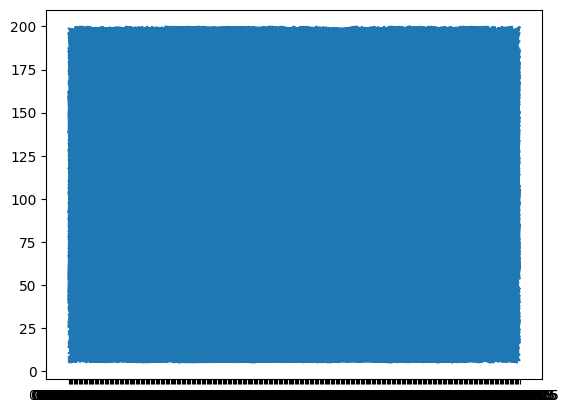

In [ ]:
#4 What is the trend of total sales over months?
import matplotlib.pyplot as plt
x=df["t_date"]
y=df["t_amt"]
plt.plot(x,y)
plt.show()
#this is not the correct way to plot the trend of total sales over months. 
# We need to group the data by month and then plot the total sales for each month.

In [8]:
#5 What is the highest single transaction amount recorded?
df["t_amt"].max()

np.float64(200.0)

In [9]:
#6 Which service category contributes the most to total revenue
df.groupby("services")["t_amt"].mean()

services
Air Sports                103.455104
Combat Sports             101.061761
Dancing                   102.907512
Exercise & Fitness        103.660247
Games                     102.272968
Gymnastics                102.385901
Indoor Games              103.074684
Jumping                   102.155171
Outdoor Play Equipment    101.281196
Outdoor Recreation        100.999480
Puzzles                   100.595997
Racquet Sports            103.647461
Team Sports               102.738998
Water Sports              101.899975
Winter Sports             101.217718
Name: t_amt, dtype: float64

In [10]:
#7 Which product generated the highest revenue?
df.groupby('products_used')['t_amt'].sum().idxmax()

'Yoga & Pilates'

In [11]:
#8 How does the average transaction amount vary between services?
df.groupby("services")["t_amt"].mean()

services
Air Sports                103.455104
Combat Sports             101.061761
Dancing                   102.907512
Exercise & Fitness        103.660247
Games                     102.272968
Gymnastics                102.385901
Indoor Games              103.074684
Jumping                   102.155171
Outdoor Play Equipment    101.281196
Outdoor Recreation        100.999480
Puzzles                   100.595997
Racquet Sports            103.647461
Team Sports               102.738998
Water Sports              101.899975
Winter Sports             101.217718
Name: t_amt, dtype: float64

In [12]:
#9 How many unique customers made purchases?

df["cust_id"].nunique()

9926

In [13]:
#10  Which customers have spent the most overall?
df.groupby("cust_id")["t_amt"].sum().idxmax()

np.int64(4009485)

In [14]:
#11 What is the average number of transactions per customer?
df.groupby("cust_id").size().mean()

np.float64(5.037275841225066)

In [15]:
#12 Are there customers who made multiple purchases in different categories?
df.groupby("cust_id")["services"].nunique()>1

cust_id
4000000    True
4000001    True
4000002    True
4000003    True
4000004    True
           ... 
4009995    True
4009996    True
4009997    True
4009998    True
4009999    True
Name: services, Length: 9926, dtype: bool

In [16]:
#13 What percentage of customers are repeat buyers?
a=df["cust_id"].value_counts()>1
a.value_counts(normalize=True)*100

count
True     96.564578
False     3.435422
Name: proportion, dtype: float64

In [17]:
a.mean()*100

np.float64(96.5645778762845)

In [18]:
#14 Which product category has the highest total sales?
df.groupby("products_used")["t_amt"].sum().idxmax()

'Yoga & Pilates'

In [19]:
#15 Which services are most popular by transaction count?
df.groupby("services")["t_amt"].count().idxmax()

'Outdoor Recreation'

In [20]:
df["services"].value_counts().idxmax()

'Outdoor Recreation'

In [21]:
#16 For each service, which product type is purchased most frequently?
df.groupby(["services","products_used"]).size().groupby(level=0).idxmax()

services
Air Sports                                        (Air Sports, Parachutes)
Combat Sports                                      (Combat Sports, Boxing)
Dancing                                             (Dancing, Ballet Bars)
Exercise & Fitness        (Exercise & Fitness, Cardio Machine Accessories)
Games                                                     (Games, Mahjong)
Gymnastics                                     (Gymnastics, Balance Beams)
Indoor Games                                      (Indoor Games, Foosball)
Jumping                                             (Jumping, Trampolines)
Outdoor Play Equipment                (Outdoor Play Equipment, Swing Sets)
Outdoor Recreation                        (Outdoor Recreation, Lawn Games)
Puzzles                                          (Puzzles, Jigsaw Puzzles)
Racquet Sports                                 (Racquet Sports, Badminton)
Team Sports                                          (Team Sports, Hockey)
Water Sports    

In [22]:
#17 What is the average transaction amount per product type?
df.groupby("products_used")["t_amt"].mean()

products_used
Abdominal Equipment    105.362798
Air Hockey             103.775478
Air Suits              101.421832
Archery                 97.345564
Badminton              108.441138
                          ...    
Wetsuits               102.042775
Whitewater Rafting     102.877744
Windsurfing            104.161453
Wrestling               97.895364
Yoga & Pilates         107.668784
Name: t_amt, Length: 125, dtype: float64

In [23]:
#18 Are there specific services where customers spend significantly more?
df.groupby("services")["t_amt"].quantile(0.75).count()

np.int64(15)

In [24]:
#19 Which state has the highest total sales?
df.groupby("state")["t_amt"].sum().idxmax()


'California'

In [25]:
df

,t_date,cust_id,t_amt,services,products_used,city,state,t_details
0,06-26-2015,4007024,40.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit
1,05-26-2015,4006742,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit
2,06-01-2015,4009775,5.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit
3,06-05-2015,4002199,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit
4,12-17-2015,4002613,98.81,Team Sports,Field Hockey,Nashville,Tennessee,credit
...,...,...,...,...,...,...,...,...
49995,09-18-2015,4005664,53.95,Games,Dice Games,Irving,Texas,credit
49996,10-02-2015,4007287,163.81,Games,Poker Chips & Sets,Kansas City,Missouri,credit
49997,05-03-2015,4003954,35.85,Racquet Sports,Squash,New Orleans,Louisiana,cash
49998,10-23-2015,4007843,180.41,Gymnastics,Vaulting Horses,Berkeley,California,credit


In [26]:
#20 Which city records the highest number of transactions?
df["city"].value_counts().idxmax()

'Pasadena'

In [27]:
#21 What is the average spending per transaction in each state?
df.groupby("state")["t_amt"].mean()

state
Alabama                 102.487049
Arizona                 102.172241
California              102.652182
Colorado                101.537415
Connecticut              99.982108
District of Columbia    103.800334
Florida                 103.136567
Georgia                 102.330675
Hawaii                  101.536667
Idaho                    98.969538
Illinois                100.166315
Indiana                 100.712664
Iowa                    103.100727
Kansas                  101.436926
Kentucky                104.130392
Louisiana               103.466335
Maryland                100.506913
Massachusetts           104.541571
Michigan                101.547777
Minnesota               103.465157
Mississippi             101.214926
Missouri                100.969040
Nebraska                101.955690
Nevada                  105.434718
New Jersey              103.438005
New York                100.259452
North Carolina          103.033172
Ohio                    101.350817
Oklahoma      

In [28]:
#22 Are certain services more popular in specific states?
df.groupby("state")["services"].value_counts().groupby(level=0).idxmax()

state
Alabama                              (Alabama, Outdoor Recreation)
Arizona                              (Arizona, Outdoor Recreation)
California                        (California, Outdoor Recreation)
Colorado                            (Colorado, Outdoor Recreation)
Connecticut                      (Connecticut, Outdoor Recreation)
District of Columbia    (District of Columbia, Exercise & Fitness)
Florida                              (Florida, Outdoor Recreation)
Georgia                              (Georgia, Outdoor Recreation)
Hawaii                                (Hawaii, Outdoor Recreation)
Idaho                                  (Idaho, Outdoor Recreation)
Illinois                            (Illinois, Outdoor Recreation)
Indiana                              (Indiana, Outdoor Recreation)
Iowa                                    (Iowa, Outdoor Recreation)
Kansas                                (Kansas, Outdoor Recreation)
Kentucky                            (Kentucky, Outdoor R

In [29]:
#23 Which states buy the most Outdoor Recreation products?
df.loc[(df["services"]=="Outdoor Recreation"),"state"].value_counts().idxmax()

'California'

In [30]:
#24 Compare average spending between California and Texas customers.
df.groupby("state")["t_amt"].mean().loc[["California","Texas"]]

state
California    102.652182
Texas         101.379891
Name: t_amt, dtype: float64

In [31]:
#25 Which quarter of the year saw the highest sales?
df["t_date"]=pd.to_datetime(df["t_date"])
df["quater"]=df["t_date"].dt.quarter
df.groupby("quater")["t_amt"].sum().idxmax()

np.int32(3)

In [32]:
#26 How does total sales vary month by month?
df["month"]=df["t_date"].dt.month
df.groupby("month")["t_amt"].sum()

month
1     438165.76
2     395262.37
3     444664.24
4     420695.24
5     432627.58
6     421074.55
7     439560.80
8     434255.01
9     429321.63
10    424856.28
11    408846.35
12    421490.73
Name: t_amt, dtype: float64

In [33]:
#27 What is the total number of transactions per month?
df["month"].value_counts()

month
3     4360
1     4268
7     4252
8     4250
5     4205
10    4181
4     4175
6     4171
9     4160
12    4150
11    3994
2     3834
Name: count, dtype: int64

In [34]:
df.groupby("month").size()

month
1     4268
2     3834
3     4360
4     4175
5     4205
6     4171
7     4252
8     4250
9     4160
10    4181
11    3994
12    4150
dtype: int64

In [37]:
#28 Is there a particular season when sports equipment sales spike?


In [48]:
#29 How many transactions were done using credit?
df.loc[(df["t_details"]=="credit")].shape[0]


43151

In [49]:
#30 What is the total revenue generated from credit transactions?
df.loc[(df["t_details"]=="credit"),"t_amt"].sum()

np.float64(4923134.930000001)

In [52]:
#31 Is there a difference in average spending between credit and debit customers?
df.groupby("t_details")["t_amt"].mean()

t_details
cash       27.403360
credit    114.090865
Name: t_amt, dtype: float64

In [58]:
#32 Which states or cities should the company focus on for marketing high-value products?


In [64]:
#33 Should more inventory be stocked for Exercise & Fitness products given their popularity?
df["services"].value_counts()

services
Outdoor Recreation        8383
Exercise & Fitness        7394
Team Sports               6010
Water Sports              5219
Games                     3666
Gymnastics                3196
Winter Sports             3181
Outdoor Play Equipment    2910
Indoor Games              2799
Jumping                   2015
Combat Sports             1630
Racquet Sports            1611
Air Sports                 960
Puzzles                    612
Dancing                    414
Name: count, dtype: int64

In [70]:
#34 Are there product categories with high sales but low average transaction amounts?
df["products_used"].value_counts().idxmax()


'Lawn Games'

In [71]:
df.groupby("products_used")["t_amt"].mean()

products_used
Abdominal Equipment    105.362798
Air Hockey             103.775478
Air Suits              101.421832
Archery                 97.345564
Badminton              108.441138
                          ...    
Wetsuits               102.042775
Whitewater Rafting     102.877744
Windsurfing            104.161453
Wrestling               97.895364
Yoga & Pilates         107.668784
Name: t_amt, Length: 125, dtype: float64

In [74]:
#35 Are there underperforming service categories that need promotional offers?
df["services"].value_counts()

services
Outdoor Recreation        8383
Exercise & Fitness        7394
Team Sports               6010
Water Sports              5219
Games                     3666
Gymnastics                3196
Winter Sports             3181
Outdoor Play Equipment    2910
Indoor Games              2799
Jumping                   2015
Combat Sports             1630
Racquet Sports            1611
Air Sports                 960
Puzzles                    612
Dancing                    414
Name: count, dtype: int64